In [27]:
#Necesarry Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
#reading the 911 calls data 

df = pd.read_csv('911.csv');

In [29]:
#info check of the DF

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [30]:
#checking the head of the DF

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [31]:
#top 5 zip-codes for 911 calls

df['zip'].value_counts().nlargest(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [32]:
#top 5 townships for 911 calls

df['twp'].value_counts().nlargest(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [33]:
#unique title coes in the df

df['title'].nunique()

110

In [34]:
#categorizing the title in a reason column

df['reasons'] = df['title'].apply(lambda x: x.split(':')[0])

In [35]:
#count of reasons for 911 calls

df['reasons'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reasons, dtype: int64

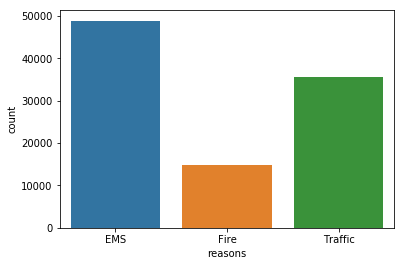

In [36]:
#plotting a count plot for reasons 

sns.countplot(df['reasons'])

In [37]:
#checking data type of timestamp

type(df['timeStamp'][0])

str

In [40]:
#converting string timestamp to time stamp object

df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [53]:
#checking a value after conversion

df['timeStamp'].iloc[0]

Timestamp('2015-12-10 17:40:00')

In [66]:
#creating columns for hour, month and week day from time stamp

df['hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['month'] = df['timeStamp'].apply(lambda x: x.month)
df['weekday'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [67]:
#dictionary for mapping weekday numbers

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [68]:
#mapping the weekday numbers to day name

df['weekday'] = df['weekday'].map(dmap)

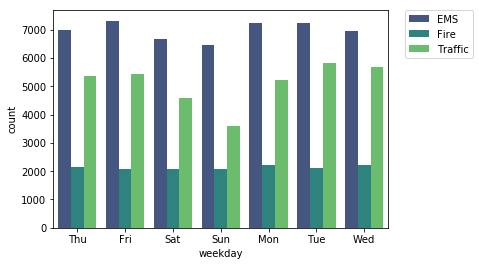

In [134]:
#using seaborn to create countplot of the weekday column with the hue based off of the Reason column

sns.countplot(x='weekday', data=df, hue='reasons', palette='viridis')

#relocating the legends
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

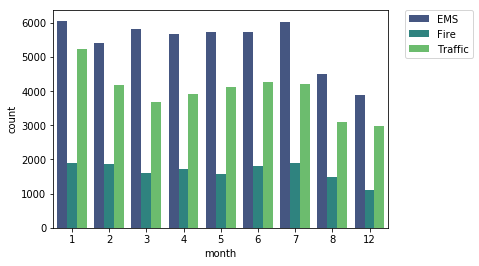

In [77]:
#using seaborn to create countplot of the month column with the hue based off of the Reason column

sns.countplot(x='month', data=df, hue='reasons', palette='viridis')

#relocating the legends
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [81]:
#In the above graph not all months are shown, 
#hence grouping the DataFrame by the month column and using the count() method for aggregation
#possibly a simple line plot might fill in the missing months

grpByMonth = df.groupby('month').count()

grpByMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reasons,hour,weekday
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


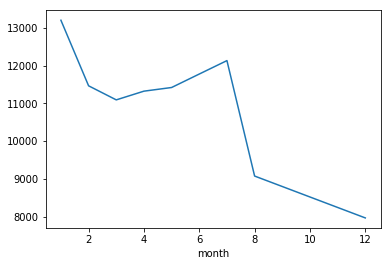

In [82]:
grpByMonth['twp'].plot()

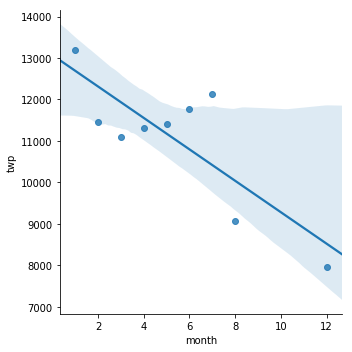

In [87]:
#linear fit on the number of calls per month

sns.lmplot(x='month', y='twp', data=grpByMonth.reset_index())

In [90]:
#creating a new column for date. Date to be extracted from timeStamp column

df['date'] = df['timeStamp'].apply(lambda timeStamp:timeStamp.date())

In [106]:
#grouping 911 calls by date

grpByDate = df.groupby('date').count()
grpByDate.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reasons,hour,month,weekday
date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


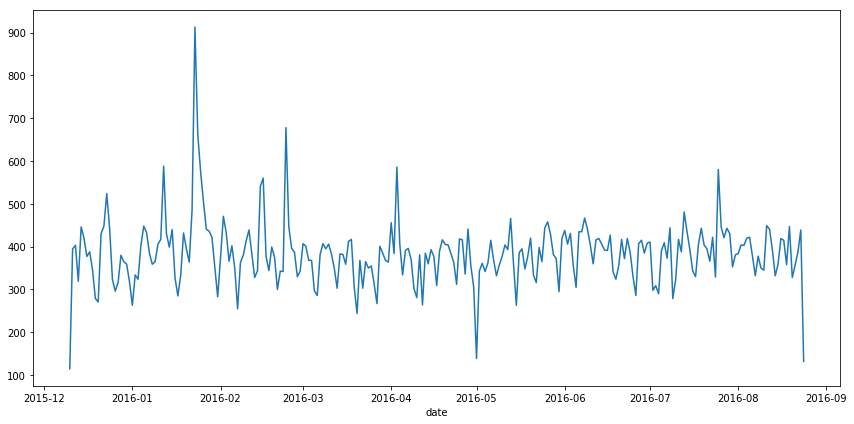

In [135]:
#plot on the 911 calls grouping by date
plt.subplots(figsize=(12,6))
grpByDate['twp'].plot()
plt.tight_layout()

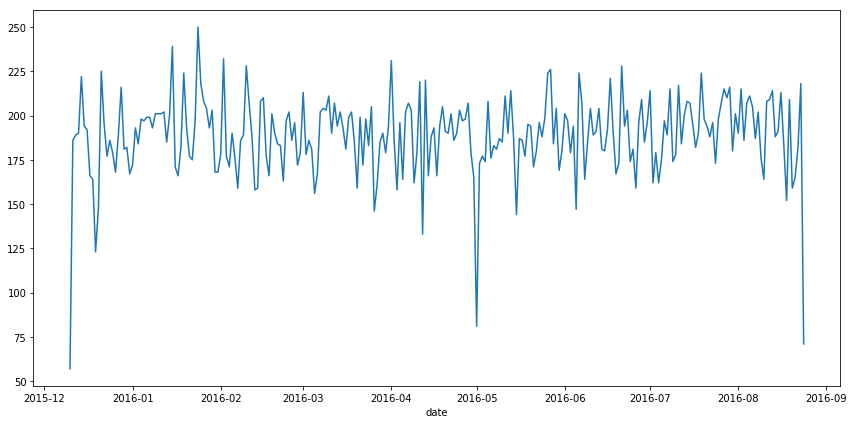

In [136]:
#plot for 911 calls grouped by date and EMS Reason
plt.subplots(figsize=(12,6))
df[df['reasons']=='EMS'].groupby('date').count()['twp'].plot()
plt.tight_layout()

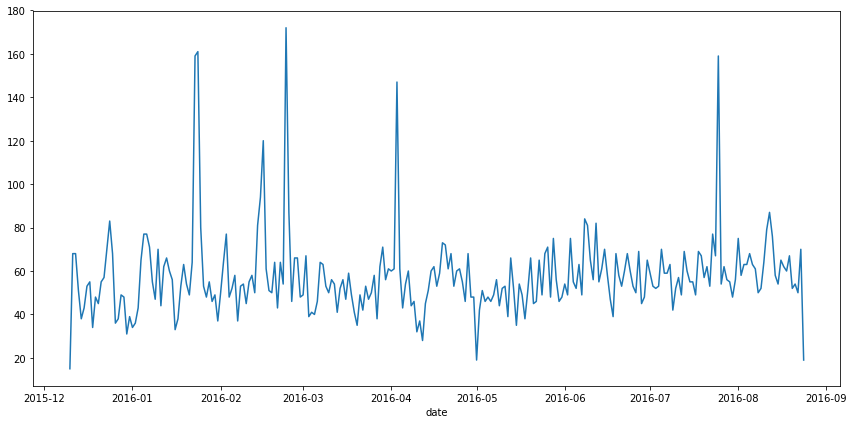

In [137]:
#plot for 911 calls grouped by date and Fire Reason
plt.subplots(figsize=(12,6))
df[df['reasons']=='Fire'].groupby('date').count()['twp'].plot()
plt.tight_layout()

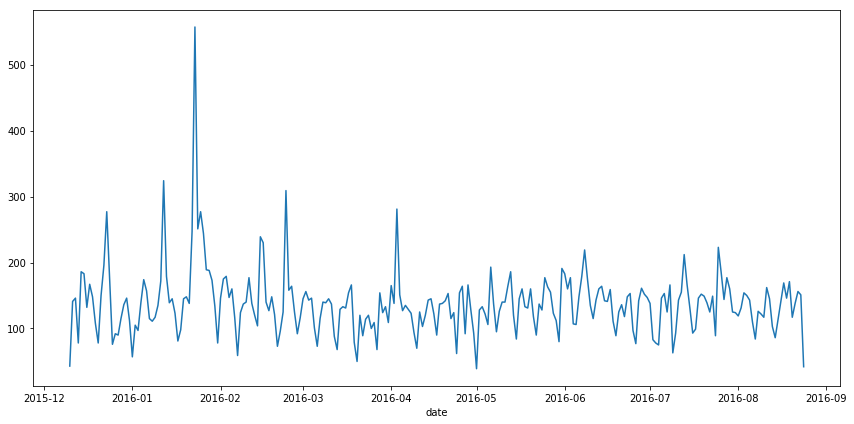

In [138]:
#plot for 911 calls grouped by date and Traffic Reason
plt.subplots(figsize=(12,6))
df[df['reasons']=='Traffic'].groupby('date').count()['twp'].plot()
plt.tight_layout()

In [105]:
#restructuring the dataframe so that the columns become the Hours and the Index becomes the Day of the Week

dayHour = df.groupby(by=['weekday', 'hour']).count()['reasons'].unstack()
dayHour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


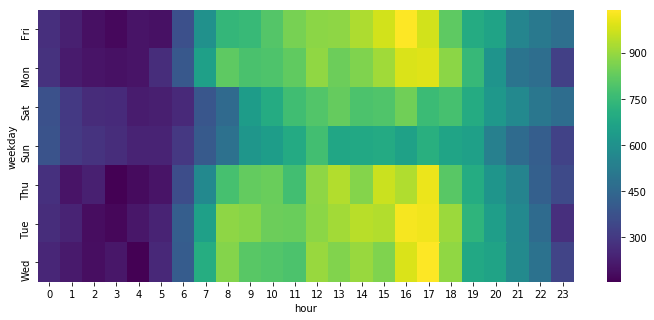

In [123]:
#heatmap for the dayHour DF

plt.subplots(figsize=(12,5))
sns.heatmap(dayHour, cmap='viridis')

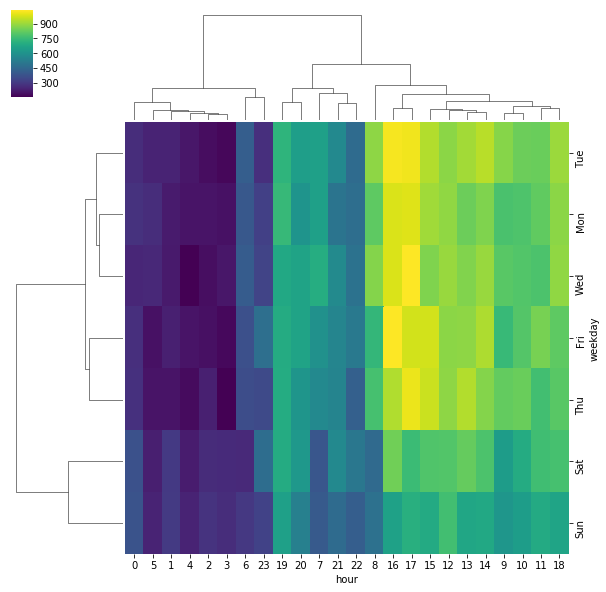

In [124]:
#clustermap for the dayHour DF

sns.clustermap(dayHour, cmap='viridis')

In [118]:
#restructuring the dataframe so that the columns become the Months and the Index becomes the Day of the Week

dayMonth = df.groupby(by=['weekday', 'month']).count()['reasons'].unstack()
dayMonth.head()

month,1,2,3,4,5,6,7,8,12
weekday,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


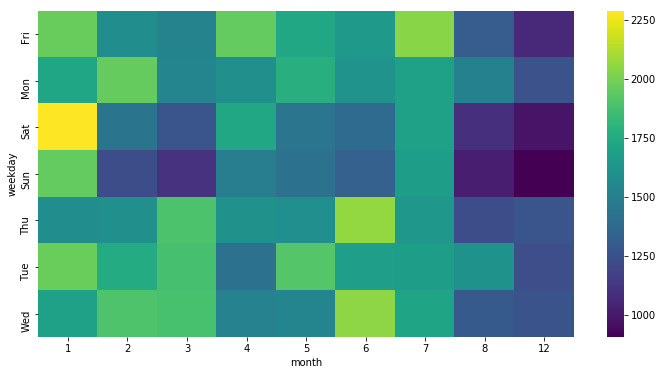

In [127]:
#heatmap for the dayMonth DF

plt.subplots(figsize=(12,6))
sns.heatmap(dayMonth, cmap='viridis')

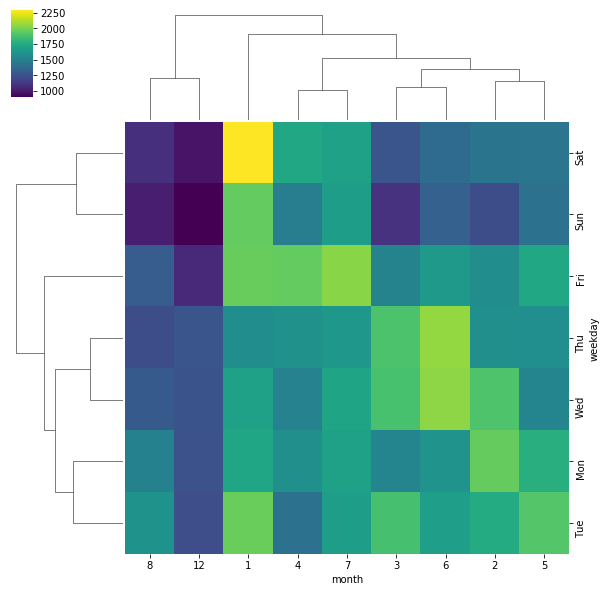

In [128]:
#clustermap for the dayHour DF

sns.clustermap(dayMonth, cmap='viridis')